# The Brief

The brief is to create an algorithm that takes a data set and outputs the probabilty of each person to survive.

---

# The beginning
The first thing with any file is the reading of the data. 
For the ease of manipulation we will use pandas. So let's import it and name it pd for ease of use.

In [1]:
import pandas             as pd
import numpy              as np
import matplotlib.pyplot  as plt
import random
import math
pd.__version__
np.__version__

'1.18.4'

In this competition I decide only to use the documentation from the official websites, and not to look on any other person's code from the competition. Hopefully this is a good way to find my strengths and weaknessess rather than copy and paste code around (or hack it). 

There is value in both, but in this exercise I am looking to discover my own limits.

From the start, a great resource that I found was the *Pandas_Cheat_Sheet.pdf* from https://pandas.pydata.org which helped a ton.

# Reading the data
Let's start by bringing in the data from the .csv

In [2]:
trainingData = pd.read_csv('./Data/train.csv')

Let's now see what is inside the training Data

In [3]:
trainingData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


As we can see, the training data is made up of 12 columns with 891 rows.

# Initial tests 
To understand the nature of the data, we would usuall perform a bunch of routine tests and procedures.

The first comand I will be using is trainingData.head(). This will show us the "head" or simply the top rows and columns of the information

In [4]:
trainingData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
trainingData.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Data Key
From Kaggle we know that each information means this  

| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

---

The second command is dtypes which is short for data types.

This shows you what type of data types are within each column.

As we can see from the information and the 

In [6]:
trainingData.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
trainingData.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [8]:
trainingData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


A good fast test is do use describe, to get an "off the bat" statistical representation of your numerical data. Afterwards, to understand the accuracy I wanted to know how much of the above information is missing from the dataset. By performing count, I quickly found out that there are some gaps in the age information, cabin number and embarked status. 

In [9]:
trainingData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As we can see from the above,
- 38.3% of the passengers survived
- 

# Cleaning the data

First thing I observed was that passenger id's were a useless information as it was doubling up on the pandas indexing. Thus we can remove this column of information with the *drop* function.

In [10]:
trainingData = trainingData.drop(columns = ['PassengerId'])

# Analysis

## First thoughts

The first thing I wanted to test for was the corelation between sex and the other information, as in this case it is registered as a binary male/female thus easy to observe. I initially went the long way about it, but then subsequently discovered 2 additional optinal ways of analysing it. 

### The long winded way

In [11]:
i=0
TotalSumMale = 0
numberMale = 0

TotalSumFemale = 0
numberFemale = 0

for a in trainingData.Sex.array:
    if a == "male":
        TotalSumMale += trainingData.Survived[i]
        numberMale += 1
    elif a == "female":
        TotalSumFemale += trainingData.Survived[i]
        numberFemale += 1
    i+=1
print ("Male Chance of surving "+ '{:s}'.format('{:.2f}'.format(TotalSumMale/numberMale*100)) +"%")
                                    # As you can see at this point I am casting it to a string 
                                    # and rounding the precision down to 2 digits
print ("Female Chance of surving " + str(round((TotalSumFemale/numberFemale*100),2)) +"%")
print ("Chance of surving: " + str(trainingData.Survived.mean()*100))

Male Chance of surving 18.89%
Female Chance of surving 74.2%
Chance of surving: 38.38383838383838


### The less long winded way

But then I found a much sleeker way of solving it by using the function *loc*. Not only does it take less space but furthermore it also opens wonderful possibilities to analyse the numerical data.

In [12]:
print ("Female Stats:")
print (round(trainingData.loc[trainingData.Sex == "female"].describe()),2)
print ()

print ("Male Stats:")
print (trainingData.loc[trainingData.Sex == "male"].describe())

Female Stats:
       Survived  Pclass    Age  SibSp  Parch   Fare
count     314.0   314.0  261.0  314.0  314.0  314.0
mean        1.0     2.0   28.0    1.0    1.0   44.0
std         0.0     1.0   14.0    1.0    1.0   58.0
min         0.0     1.0    1.0    0.0    0.0    7.0
25%         0.0     1.0   18.0    0.0    0.0   12.0
50%         1.0     2.0   27.0    0.0    0.0   23.0
75%         1.0     3.0   37.0    1.0    1.0   55.0
max         1.0     3.0   63.0    8.0    6.0  512.0 2

Male Stats:
         Survived      Pclass         Age       SibSp       Parch        Fare
count  577.000000  577.000000  453.000000  577.000000  577.000000  577.000000
mean     0.188908    2.389948   30.726645    0.429809    0.235702   25.523893
std      0.391775    0.813580   14.678201    1.061811    0.612294   43.138263
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   21.000000    0.000000    0.000000    7.895800
50%      0.000000    3.000000   29.

### The final method 

The beest method I found at this point was to use the grouping function. The output is tidy and easier to compare, which makes it easier for me to understand what is going on

In [13]:
trainingData.groupby("Sex").describe()

Survived                                              Pclass            \
          count      mean       std  min  25%  50%  75%  max  count      mean   
Sex                                                                             
female    314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0  314.0  2.159236   
male      577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0  577.0  2.389948   

        ... Parch        Fare                                               \
        ...   75%  max  count       mean        std   min        25%   50%   
Sex     ...                                                                  
female  ...   1.0  6.0  314.0  44.479818  57.997698  6.75  12.071875  23.0   
male    ...   0.0  5.0  577.0  25.523893  43.138263  0.00   7.895800  10.5   

                         
          75%       max  
Sex                      
female  55.00  512.3292  
male    26.55  512.3292  

[2 rows x 48 columns]

The first thing that looked interesting was the hihg ratio of males to females

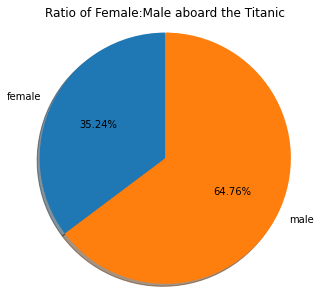

In [14]:
SGroup = trainingData.groupby("Sex")

tmp = SGroup.size().array # Tidy way of extracting the distribution
labels = SGroup.groups.keys() # Tidy way of extracting the group keys


fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(tmp,labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.set_title("Ratio of Female:Male aboard the Titanic")

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

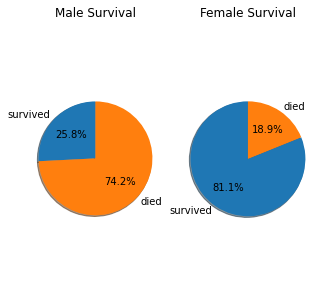

In [15]:
FGSurvived = trainingData.loc[trainingData.Sex == 'female'].groupby("Survived")
MGSurvived = trainingData.loc[trainingData.Sex == 'male'].groupby("Survived")
tmp = FGSurvived.size().array # Tidy way of extracting the distribution
labels = FGSurvived.groups.keys() # Tidy way of extracting the group keys

labels = {"survived","died"}
fig1, ax1 = plt.subplots(1,2,figsize=(5, 5))
ax1[0].set_title("Male Survival")
ax1[0].pie(tmp, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1[0].axis('equal')

labels = {"survived","died"}
tmp = MGSurvived.size().array # Tidy way of extracting the distribution
ax1[1].set_title("Female Survival")
ax1[1].pie(tmp, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

----
# Prediction 1
### An approach based on Bayes Theorem

Using the data above and Bayes Theorem we can make our first rough predicition. 

*For more on Bayes Theorem visit my note on it @ www.github.com/cstm/bayesprediction*

Thus for a man the probability of surviving is equal to the proabilty of being a man * the probability of surviving divided by the sum of the probability of being a man* the probability of surviving plus the probability of not being a man * the probability of surviving and not being a man. 

Wow! That makes very little if any sense in written format but let's have a look at the mathematical formula




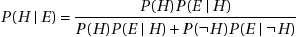

In [16]:
nuPeople = trainingData.Survived.count()
nuMale = trainingData.loc[trainingData.Sex == 'male'].Survived.count()
nuMaleSurvived = trainingData.loc[trainingData.Sex == 'male'].Survived.sum()

nuPeopleNM = trainingData.loc[trainingData.Sex == 'female'].Survived.count()
nuPeopleNMS = trainingData.loc[trainingData.Sex == 'female'].Survived.sum()

#prob = nuPeople/nuMaleSurvived
#text = "Number of People {nuP:.2f}, Number of Men {nuM:.2f}, Number of Men Survived {nuMS:.2f}"
#print (text.format(nuP=nuPeople,nuM= nuMale, nuMS=nuMaleSurvived))

Pmen =  nuMale/nuPeople

Pmen =  Pmen*100/nuMaleSurvived

Pmen =  Pmen/(Pmen+ (nuPeople/nuPeopleNM)*100/nuPeopleNMS)*100
print ('P(H|E) = {:.2f}%'.format(Pmen))

P(H|E) = 32.79%


So in the above application, a man would have an estimated 32.79% chance of surviving. Let's try to apply this to our test.

In [17]:
testData = pd.read_csv('./Data/test.csv')

testData=testData.drop(columns = ['PassengerId']) #clean the data again

testData.insert(0,column="Survived",value=True)

To each member I would like to allocate a random number between 1 and 100 which represents their chance of surviving or not. If the chance is smaller than the calculated chance of survival it means they survive. 

In [18]:
random.seed(3)
testData["Chance"] = np.random.uniform(1, 100, testData.shape[0])
testData.Chance.describe()

count    418.000000
mean      52.590578
std       28.094077
min        1.299881
25%       30.170931
50%       53.294361
75%       77.174916
max       99.991218
Name: Chance, dtype: float64

In [30]:
FGSurvived = 0
MGSurvived = 0

TestMen = testData.loc[testData.Sex == 'male']


Survived  = TestMen.loc[TestMen.Chance < Pmen]
NSurvived = TestMen.loc[TestMen.Chance >= Pmen]
for a in NSurvived.Survived:
    a = False


numberSurvived = Survived.Survived.count()
numberNSurvived = NSurvived.Survived.count()

print (numberSurvived)
print (numberNSurvived)

76
190


Now let's see what our predictions are showing

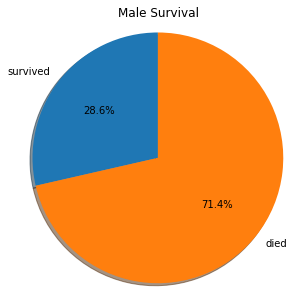

In [20]:
tmp = [numberSurvived,numberNSurvived] # Tidy way of extracting the distribution


labels = {"survived","died"}
fig1, ax1 = plt.subplots(1,figsize=(5, 5))
ax1.set_title("Male Survival")
ax1.pie(tmp, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

Of course this is a very rough first estimate, but using the Bayes Theorem we can develop the predictions further based on all the other factors that potentially led to survival.

In [29]:
NSurvived.Survived

2      True
5      True
7      True
11     True
13     True
       ... 
401    True
413    True
415    True
416    True
417    True
Name: Survived, Length: 190, dtype: bool